In [5]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
df= pd.read_csv('/content/Bengaluru_House_Data.xls')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
dataf= df.drop(['area_type','availability','society'], axis=1)
dataf.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [9]:
dataf['bhk']= dataf['size'].str[0:2]
dataf.head()


,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [10]:
dataf.price.describe()

,price
count,13320.000000
mean,112.565627
std,148.971674
min,8.000000
25%,50.000000
50%,72.000000
75%,120.000000
max,3600.000000


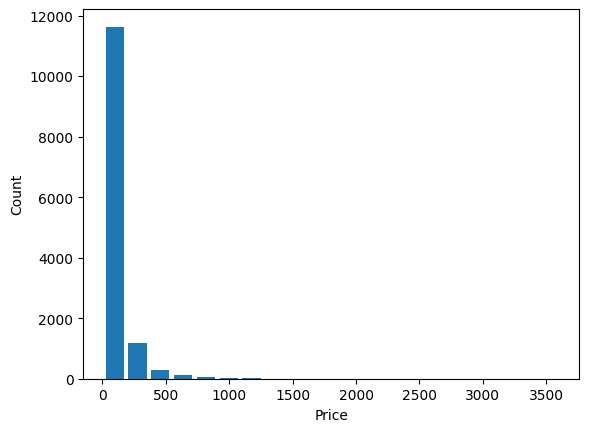

In [11]:
plt.hist(dataf.price, bins= 20, rwidth= 0.8)
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


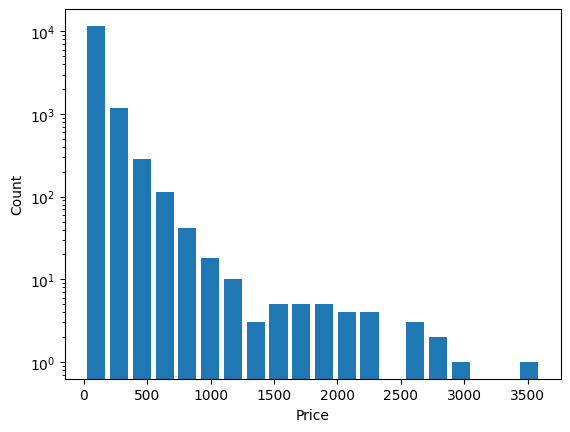

In [12]:
plt.hist(dataf.price, bins= 20, rwidth= 0.8)
plt.xlabel('Price')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [13]:
lower, upper= dataf.price.quantile([0.001, 0.999])
lower,upper



(11.159500000000001, 2000.0)

In [14]:
outliers= dataf[(dataf.price> upper) | (dataf.price< lower)]
outliers.sample(10)


,location,size,total_sqft,bath,balcony,price,bhk
8594,Chandapura,1 BHK,450,1.0,1.0,9.00,1
2437,Attibele,1 BHK,395,1.0,1.0,10.25,1
13200,Defence Colony,6 Bedroom,8000,6.0,3.0,2800.00,6
171,Attibele,1 BHK,450,1.0,1.0,11.00,1
8653,Doddaballapur,2 Bedroom,640,1.0,0.0,10.50,2
13197,Ramakrishnappa Layout,4 Bedroom,9200,4.0,NaN,2600.00,4
10526,Yelahanka New Town,1 BHK,284,1.0,1.0,8.00,1
10304,5th Block Jayanagar,4 Bedroom,10624,4.0,2.0,2340.00,4
12579,Chandapura,1 BHK,410,1.0,1.0,10.00,1
6421,Bommenahalli,4 Bedroom,2940,3.0,2.0,2250.00,4


In [15]:
dataf2= dataf[(dataf.price < upper) & (dataf.price > lower)]
dataf2.shape

(13291, 7)

In [16]:
dataf.shape

(13320, 7)

In [17]:
dataf.shape[0] - dataf2.shape[0]

29

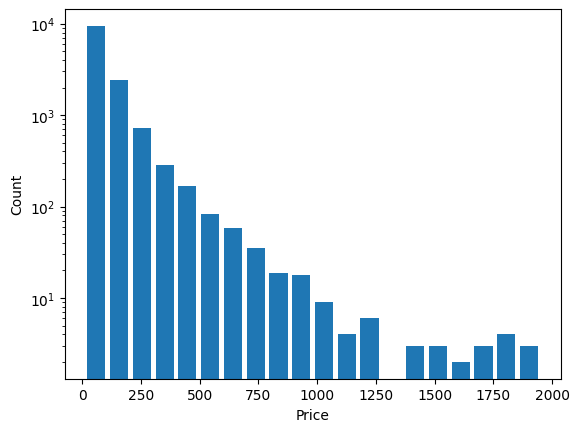

In [18]:
plt.hist(dataf2.price, bins= 20, rwidth= 0.8)
plt.xlabel('Price')
plt.ylabel('Count')
plt.yscale('log')
plt.show()


In [19]:
dataf2.price.mean(), dataf2.price.std()

(110.01036077044617, 125.43434724473614)

In [20]:
maxL= dataf2.price.mean() + 4*dataf2.price.std()
minL= dataf2.price.mean() - 4*dataf2.price.std()
minL, maxL

(-391.7270282084984, 611.7477497493908)

In [21]:
dataf3= dataf2[(dataf2.price> minL) & (dataf2.price < maxL)]
dataf3.head()


,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [22]:
dataf2.shape[0]-dataf3.shape[0]

147

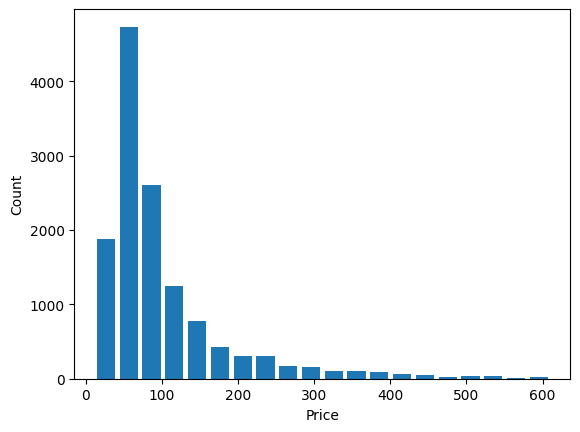

In [23]:
plt.hist(dataf3.price, bins= 20, rwidth= 0.8)
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


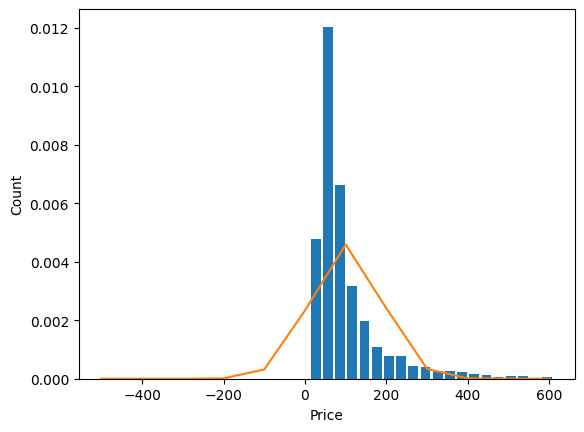

In [24]:
from scipy.stats import norm
import numpy as np

plt.hist(dataf3.price, bins=20, rwidth=0.8, density=True)
plt.xlabel('Price')
plt.ylabel('Count')


rng = np.arange(-500, dataf3.price.max(), 100)
plt.plot(rng, norm.pdf(rng,dataf3.price.mean(),dataf3.price.std()))